In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Dataset Loading

1.The task in MNIST digit classification is to correctly classify handwritten digits into one of these 10 categories

2.Each sample in the dataset is a grayscale image of size 28×28 pixels.

3.Classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train.shape

(60000, 28, 28)

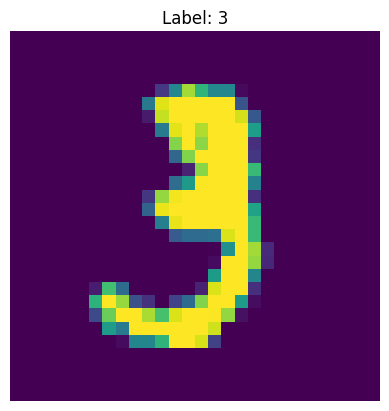

In [7]:
plt.imshow(x_train[10])
plt.title(f"Label: {y_train[10]}")
plt.axis('off')
plt.show()

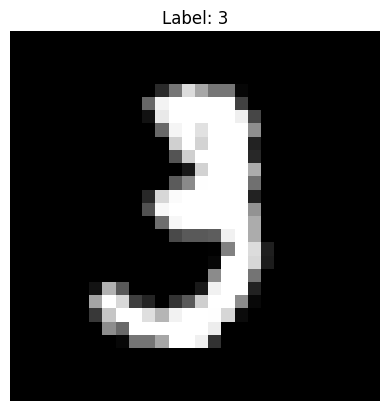

In [8]:
plt.imshow(x_train[10], cmap='gray')
plt.title(f"Label: {y_train[10]}")
plt.axis('off')
plt.show()

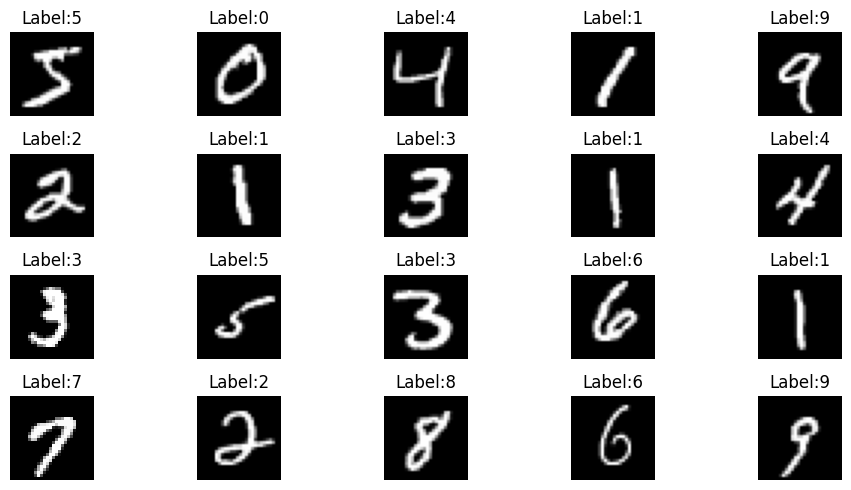

In [9]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label:{y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Normalization
1. **Reshaping prepares the data for fully connected layers in a neural network.**
2. **Normalization ensures faster and more stable training by scaling input values.**

In [10]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)



Define the Neural Network Architecture

In [20]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),  # Input layer
    Dense(64, activation='relu'),                         # Hidden layer
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')                       # Output layer
])

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Train the Model

1. ** Batch Size:A batch size of 32 means that 32 samples are used to compute the gradient and update the model weights before the next batch of 32 samples is processed.**

2. ** Number of Epochs: The number of times the entire training dataset is passed through the model.**

In [15]:

45000/32

1406.25

In [27]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.25)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9837 - loss: 0.0553 - val_accuracy: 0.9681 - val_loss: 0.1306
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9893 - loss: 0.0391 - val_accuracy: 0.9618 - val_loss: 0.1663
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9827 - loss: 0.0656 - val_accuracy: 0.9671 - val_loss: 0.1407
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.9599 - val_loss: 0.1864
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9876 - loss: 0.0422 - val_accuracy: 0.9678 - val_loss: 0.1483


In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n Test Accuracy: {test_accuracy}")
print(f"\n Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9666 - loss: 0.1464

 Test Accuracy: 0.97079998254776

 Test Loss: 0.12876512110233307


In [ ]:
y_pred = model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step


array([[2.2045635e-14, 1.2233152e-11, 3.6988093e-09, ..., 9.9999774e-01,
        2.9163083e-10, 1.0920961e-06],
       [1.2594813e-07, 1.1841254e-06, 9.9985433e-01, ..., 3.8438911e-06,
        3.8717179e-05, 1.0494228e-05],
       [8.9247162e-27, 9.9999917e-01, 4.9401530e-07, ..., 5.4932992e-22,
        3.5734396e-07, 2.0805333e-13],
       ...,
       [1.3625448e-12, 5.5879582e-06, 3.1032485e-08, ..., 1.1576000e-07,
        3.3988485e-06, 3.5084509e-03],
       [2.5081735e-13, 1.5612914e-33, 9.7833417e-24, ..., 2.2857549e-19,
        3.4631086e-11, 2.6454253e-15],
       [1.3505534e-07, 1.0586072e-10, 5.7261501e-10, ..., 0.0000000e+00,
        1.2092166e-06, 4.5805356e-12]], dtype=float32)


Compute the confusion matrix

In [29]:

y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

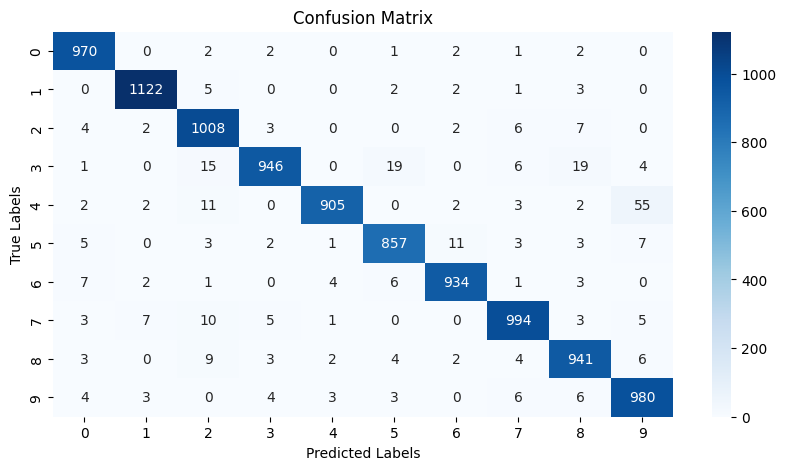

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

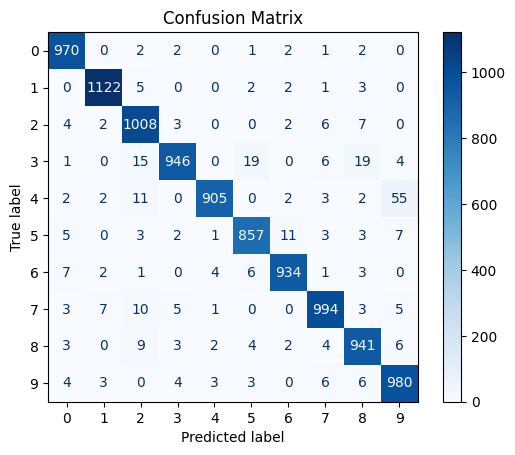

In [41]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [38]:
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.96      1032
           3       0.98      0.94      0.96      1010
           4       0.99      0.92      0.95       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.93      0.97      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [42]:
model.save('nn_model.h5')

In [43]:
load_model = tf.keras.models.load_model('nn_model.h5')

load_model

<Sequential name=sequential_2, built=True>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
True Label : 4
Predicted Label : [4]


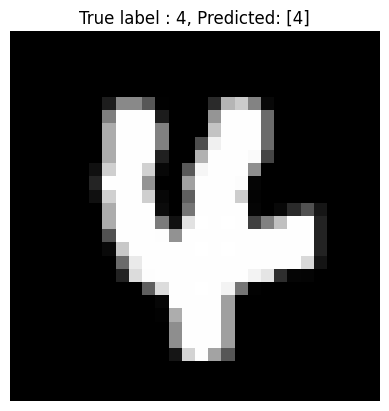

In [44]:
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
random_label = y_test[random_index]


random_image = random_image.reshape(1, 28*28)
predictions = load_model.predict(random_image)
predicted_label = np.argmax(predictions, axis=1)

print(f"True Label : {random_label}")
print(f"Predicted Label : {predicted_label}")

plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"True label : {random_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


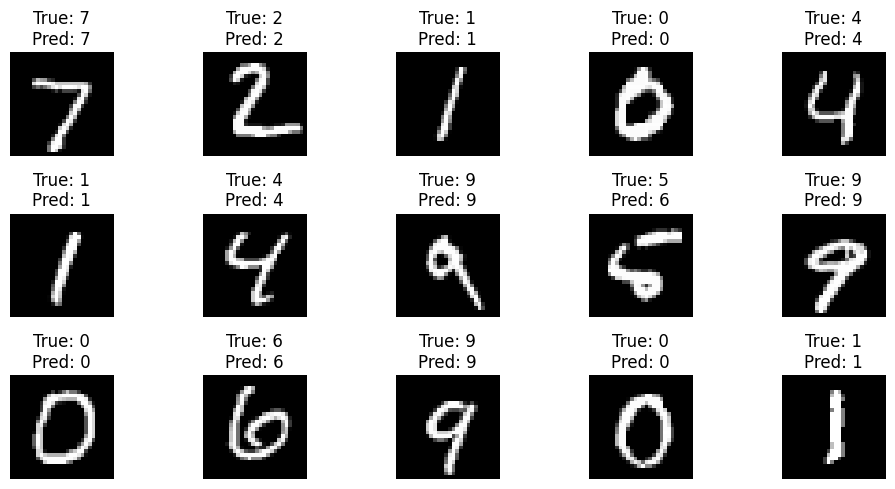

In [47]:
sample_images = x_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(load_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()